#Analisis de Sentimientos

*   TextBlob
*   GoogleTranslator

In [ ]:
import tweepy 
from textblob import TextBlob 
from wordcloud import WordCloud
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
!pip install deep-translator
from deep_translator import GoogleTranslator
plt.style.use('fivethirtyeight')

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
def hacer_corpus_mod(tweets):
    corpus = []
    for i in range(0, len(tweets)):
        #eliminamos los links y hasgtags
        tweets['tweet'][i] = " ".join([word for word in tweets['tweet'][i].split()
                                        if 'http' not in word and '@' not in word and '#' not in word])
        #definimos caracteres que pueden leer
        #title = re.sub('[^a-zA-ZáéíóúñÁÉÍÓÚ]', ' ', tweets['tweet'][i])
        title = re.sub("@\S+", " ", tweets['tweet'][i])
        title = re.sub("#\S+", " ", title)
        title = title.replace('|', '')
        title = remove_emojis(title)
        #transformamos las mayusculas en minusculas
        #title = title.lower()
        #generamos los arreglos respectivos para los tweets con los carcteres aceptados
        title = title.split()
        #print(title)
        #eliminamos aquellas palabras que esten en el stopwords del español
        #title = [word for word in title if (not word in FinalStopWords and word != "rt")]
        #volvemos a crear el corpus con las palabras aceptadas
        title = ' '.join(title) + " "
        corpus.append(title)
    return corpus

In [ ]:
def traducir_en_to_es(text):
    translated = GoogleTranslator(source='en', target='es').translate(text)
    return translated
def traducir_es_to_en(text):
    translated = GoogleTranslator(source='es', target='en').translate(text)
    return translated

to_translate = 'I want to translate this text'
print(traducir_en_to_es(translated))

Quiero traducir este texto


In [ ]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

def analysis(score):
  if score < 0:
    return 'Negative'
  #elif score == 0:
   # return 'Neutral'
  # else:
  #   return 'Positive'
  else:
    return 'Positive'

In [ ]:
Data=hacer_corpus_mod(pd.read_csv('timpanoperu.csv'))
print(Data)

['"Jorge del Castillo, ladrón, rata, raaaaata!!!!!!" Tremendo recibimiento del pueblo digno de Arequipa. ', '¿A quién representa A nadie, excepto, a su padre, al ex congresista fujimorista, magnate de la educación, dueño de IDAT y de la Univ. UTP. De currículum lamentable, cero experiencia política, solo mucho dinero. ', 'No olvides q es hija del ex congresista Fujimorista Amuruz, maganate de la educación, dueño de IDAT y de la universidad UTP. La cumpleañera no representa a nadie, tan sólo a su bolsillo. ', 'La congresista Roselli Amuruz, solo representa los intereses de su padre, ex fujimorista y ahora magnate de la educación, dueño de IDAT y la Univ. UTP. O sea intereses personales. Por eso su CV es lamentable, cero experiencia. ', 'Cuanta razón tiene Héctor Béjar cuando habla de la derecha, por ejemplo respecto a los ataques: "viniendo de quienes viene y teniendo en cuenta el tipo de ataques que me han lanzado, supongo que eso contribuye a mi prestigio" ', 'En un país como el nuest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df = pd.DataFrame(Data, columns=['Tweets'])
df

,Tweets
0,"""Jorge del Castillo, ladrón, rata, raaaaata!!!..."
1,"¿A quién representa A nadie, excepto, a su pad..."
2,No olvides q es hija del ex congresista Fujimo...
3,"La congresista Roselli Amuruz, solo representa..."
4,Cuanta razón tiene Héctor Béjar cuando habla d...
5,"En un país como el nuestro, sería tremendament..."
6,"Alex Kouri, el mayor delincuente y corrupto po..."
7,"Totalmente irresponsable, en un país como el n..."
8,"Jóvenes, si van a seguir creyendo a este tipo ..."
9,Que se puede decir del periodismo que se suma ...


In [ ]:
df['Tweets'] = df['Tweets'].apply(traducir_es_to_en)
df

,Tweets
0,"""Jorge del Castillo, thief, rat, raaaaata !!!!..."
1,"Who does he represent? Nobody, except his fath..."
2,Do not forget that she is the daughter of form...
3,Congresswoman Roselli Amuruz only represents t...
4,How right is Héctor Béjar when he talks about ...
5,"In a country like ours, it would be tremendous..."
6,"Alex Kouri, the biggest criminal and corrupt p..."
7,"Totally irresponsible, in a country like ours,..."
8,"Young people, if you are going to continue to ..."
9,What can be said about the journalism that add...


In [ ]:
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)
df.head()

,Tweets,Subjectivity,Polarity
0,"""Jorge del Castillo, thief, rat, raaaaata !!!!...",0.966667,0.488889
1,"Who does he represent? Nobody, except his fath...",0.050000,0.000000
2,Do not forget that she is the daughter of form...,0.500000,0.000000
3,Congresswoman Roselli Amuruz only represents t...,0.535000,-0.125000
4,How right is Héctor Béjar when he talks about ...,0.535714,0.285714


In [ ]:
all_words = ' '.join( [twts for twts in df['Tweets']])
word_Cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['Analysis'] = df['Polarity'].apply(analysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"""Jorge del Castillo, thief, rat, raaaaata !!!!...",0.966667,0.488889,Positive
1,"Who does he represent? Nobody, except his fath...",0.050000,0.000000,Positive
2,Do not forget that she is the daughter of form...,0.500000,0.000000,Positive
3,Congresswoman Roselli Amuruz only represents t...,0.535000,-0.125000,Negative
4,How right is Héctor Béjar when he talks about ...,0.535714,0.285714,Positive
5,"In a country like ours, it would be tremendous...",1.000000,0.333333,Positive
6,"Alex Kouri, the biggest criminal and corrupt p...",0.637500,-0.475000,Negative
7,"Totally irresponsible, in a country like ours,...",0.516667,-0.133333,Negative
8,"Young people, if you are going to continue to ...",0.425000,-0.090909,Negative
9,What can be said about the journalism that add...,0.496296,0.348148,Positive


In [ ]:
df['Tweets'] = df['Tweets'].apply(traducir_en_to_es)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"""Jorge del Castillo, ladrón, rata, raaaaata !!...",0.966667,0.488889,Positive
1,"¿A quién representa? Nadie, excepto su padre, ...",0.050000,0.000000,Positive
2,No olvide que es hija del excongresista Fujimo...,0.500000,0.000000,Positive
3,La congresista Roselli Amuruz solo representa ...,0.535000,-0.125000,Negative
4,Qué razón tiene Héctor Béjar cuando habla de l...,0.535714,0.285714,Positive
5,"En un país como el nuestro, sería tremendament...",1.000000,0.333333,Positive
6,"Alex Kouri, el mayor político criminal y corru...",0.637500,-0.475000,Negative
7,"Totalmente irresponsable, en un país como el n...",0.516667,-0.133333,Negative
8,"Jóvenes, si van a seguir creyendo este tipo de...",0.425000,-0.090909,Negative
9,¿Qué se puede decir del periodismo que se suma...,0.496296,0.348148,Positive


In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) "Jorge del Castillo, ladrón, rata, raaaaata !!!!!!" Tremenda bienvenida del digno pueblo de Arequipa.

2) ¿A quién representa? Nadie, excepto su padre, el excongresista de Fujimori, magnate de la educación, dueño del IDAT y la Univ. UTP. Currículum lamentable, cero experiencia política, mucho dinero.

3) No olvide que es hija del excongresista Fujimorista Amuruz, magnate de la educación, dueño del IDAT y de la universidad UTP. La cumpleañera no representa a nadie, solo a su bolsillo.

4) Qué razón tiene Héctor Béjar cuando habla de la derecha, por ejemplo respecto a los ataques: "viniendo de quien viene y teniendo en cuenta el tipo de ataques que me han lanzado, supongo que eso contribuye a mi prestigio".

5) En un país como el nuestro, sería tremendamente irresponsable acelerar el regreso, sin haber logrado una mínima vacunación de la población. Con un lamentable sistema sanitario. Por Covid19

6) ¿Qué se puede decir del periodismo que se suma a la carga de exmilitares que se arrod

In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) La congresista Roselli Amuruz solo representa los intereses de su padre, ex Fujimori y ahora magnate de la educación, dueño del IDAT y la Univ. UTP. En otras palabras, intereses personales. Por eso su currículum es lamentable, sin experiencia.

2) Alex Kouri, el mayor político criminal y corrupto del Callao, regresa patrocinado por Willax y el exmarinero Luis Giampietri, jefes lame botas como Vladimiro Montesinos y Alan García. Se requiere una respuesta decidida contra esta turba malvada.

3) Totalmente irresponsable, en un país como el nuestro, utilizar a los niños para la crítica política, sabiendo que el Sistema de Salud es deficiente. por Covid19.

4) Jóvenes, si van a seguir creyendo este tipo de sujetos que se esconden detrás de la Marina, no duden que en unos años vivirán en un NarcoEstado. Estos son los seguidores de Montesinos, alguien que usó las fuerzas armadas y la humilló.

5) Quieren volver otra vez para robar al gobierno, saquear el Perú, pero también quieren converti

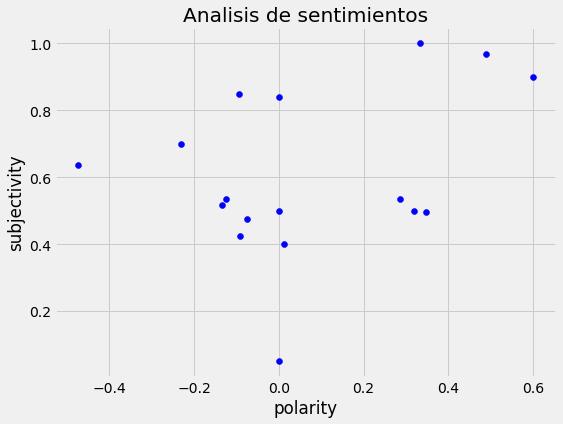

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='blue')

plt.title('Analisis de sentimientos')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [ ]:
ptweet = df[df.Analysis == 'Positive']
pteet = ptweet['Tweets']

round(ptweet.shape[0] / df.shape[0] * 100, 1)

58.8

In [ ]:
ntweet = df[df.Analysis == 'Negative']
nteet = ntweet['Tweets']

round(ntweet.shape[0] / df.shape[0] * 100, 1)

41.2

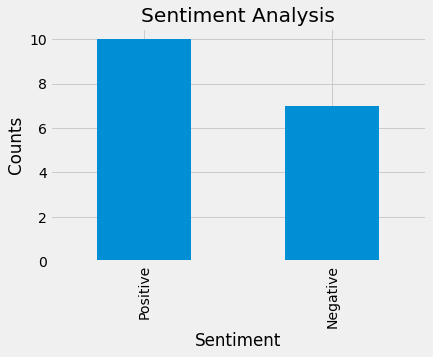

In [ ]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()